## To what extent do administrative and legal hurdles affect the effective number of parties?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("data.csv", sep=";")

<BarContainer object of 1484 artists>

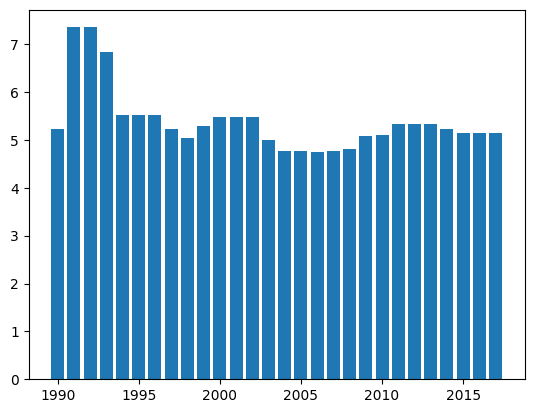

In [71]:
years = df["Year"]
eff_parties = df["Enep"]
plt.bar(years,eff_parties)

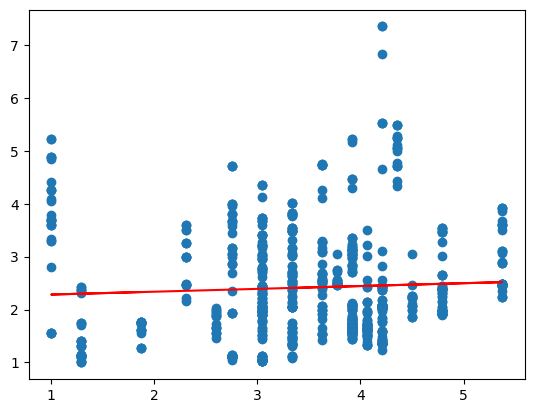

In [ ]:


df_clean = df[["Adminhurd", "Enep"]].dropna()

admin_hurdles = df_clean["Adminhurd"]
effective_parties = df_clean["Enep"]

m, b = np.polyfit(admin_hurdles, effective_parties, 1)

plt.plot(admin_hurdles, m*admin_hurdles + b, color='red')
plt.scatter(admin_hurdles , effective_parties)



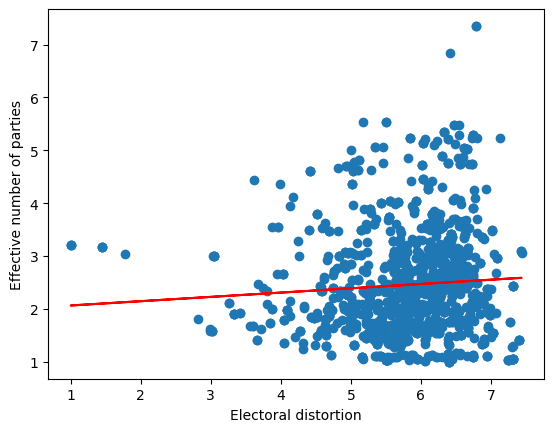

In [ ]:
df_clean = df[["REP_SR3", "Enep"]].dropna()

x = (df_clean["REP_SR3"] ) 
effective_parties = df_clean["Enep"]

m, b = np.polyfit(x, effective_parties, 1)

plt.plot(x, m*x + b, color='red')
plt.xlabel("Electoral distortion")
plt.ylabel("Effective number of parties")
plt.scatter(x, effective_parties)

In [64]:
# Correlate all variables except column 1 (Country) with Enep and display correlations with |r| > 0.5

# Exclude first column (Country) and calculate correlation matrix
df_corr = df.iloc[:, 1:].select_dtypes(include=[np.number]).corr()

# Get only correlations with Enep
enep_corr = df_corr['Enep'].drop('Enep')  # Drop Enep itself to avoid self-correlation

# Filter for |r| > 0.5 and sort by absolute value
high_corr = enep_corr[enep_corr.abs() > 0.5]
high_corr = high_corr.reindex(high_corr.abs().sort_values(ascending=False).index)

# Create a DataFrame for better display
high_corr_df = pd.DataFrame({
    'Variable': high_corr.index,
    'Correlation with Enep': high_corr.values
})

print(f"Found {len(high_corr_df)} variables with |r| > 0.5 with Enep:\n")
print(high_corr_df.to_string(index=False))


Found 8 variables with |r| > 0.5 with Enep:

 Variable  Correlation with Enep
 Largpavo               0.866101
 CO_OPEN2               0.802614
Herfindex               0.755810
   COMPET               0.690223
 CO_COMP2               0.656930
 CO_COMP3               0.597358
  CO_COMP               0.589643
  CO_OPEN               0.550204


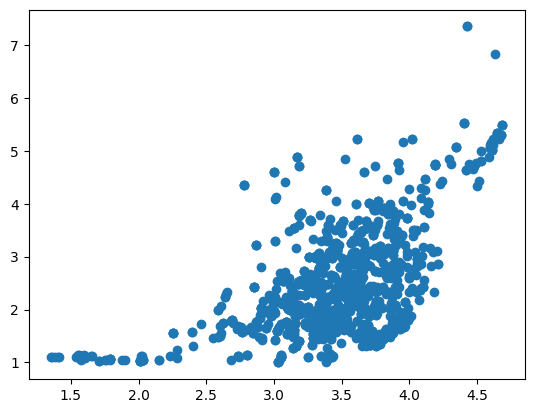

In [65]:
clean_df = df[["CO_OPEN", "Enep"]].dropna()


x = df["CO_OPEN"]
y = df["Enep"]

plt.scatter(x,y)


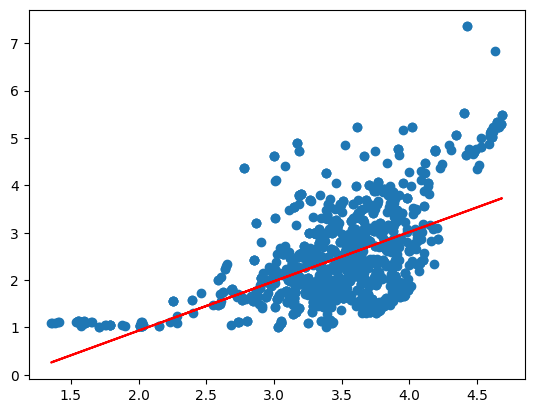

In [67]:
clean_df = df[["CO_OPEN", "Enep"]].dropna()


x = clean_df["CO_OPEN"]
y = clean_df["Enep"]

m, b = np.polyfit(x,y,1)

plt.plot(x, m*x+b, color="red")

plt.scatter(x,y)


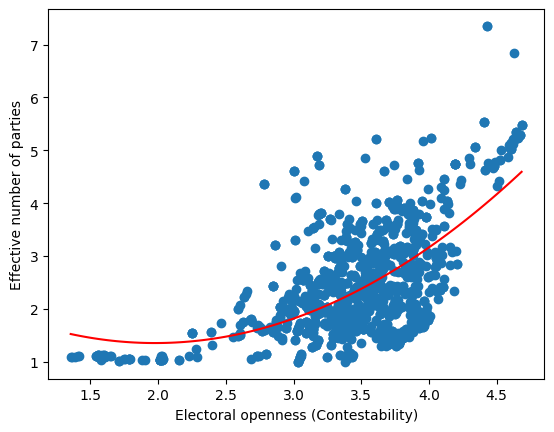

In [70]:
clean_df = df[["CO_OPEN", "Enep"]].dropna()


x = clean_df["CO_OPEN"]
y = clean_df["Enep"]

m1, m2, b = np.polyfit(x,y,2)

x_line = np.linspace(x.min(), x.max(), 100)
y_line = m1*x_line**2 + m2*x_line + b

plt.plot(x_line, y_line, color="red")

plt.xlabel("Electoral openness (Contestability)")
plt.ylabel("Effective number of parties")

plt.scatter(x,y)
